In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
sub = pd.read_csv('../input/lish-moa/sample_submission.csv')
sub.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,id_002429b5b,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,id_00276f245,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,id_0027f1083,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [27]:
tr = pd.read_csv('../input/lish-moa/train_features.csv')
tr[['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'c-0']].head()

,sig_id,cp_type,cp_time,cp_dose,g-0,c-0
0,id_000644bb2,trt_cp,24,D1,1.0620,-0.0600
1,id_000779bfc,trt_cp,72,D1,0.0743,0.0927
2,id_000a6266a,trt_cp,48,D1,0.6280,-0.1312
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.3998
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.3774


<AxesSubplot:ylabel='cp_type'>

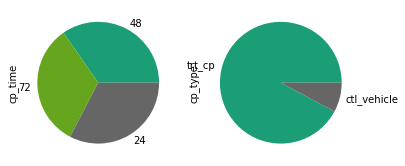

In [35]:
fig, axes = plt.subplots(1,2)
tr['cp_time'].value_counts().plot(kind='pie',cmap=cmap, ax=axes[0])
tr['cp_type'].value_counts().plot(kind='pie',cmap=cmap, ax=axes[1])

<AxesSubplot:>

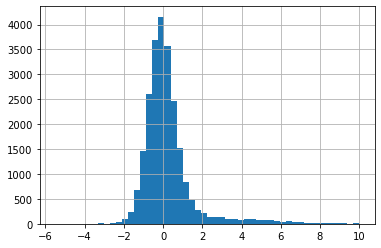

In [24]:
tr['g-0'].hist(bins=50)

In [ ]:
ns_tr = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')
ns_tr.head()

In [ ]:
s_tr = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
s_tr.head()

同じサンプルに対して、agonist, antagonistが同時に反応していないか調べる

In [36]:
# train = pd.read_csv("../input/folds/train.csv")
train = pd.read_csv('../input/lish-moa/train_features.csv')
train_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
train = pd.concat([train, train_scored.iloc[:,1:]], axis=1)
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0


In [37]:
agonists = [col for col in train.columns if '_agonist' in col]
antagonists = [col for col in train.columns if 'antagonist' in col]

In [38]:
train['agonist_sum'] = train[agonists].sum(axis=1).apply(np.sign)
train['antagonist_sum'] = train[antagonists].sum(axis=1).apply(np.sign)
train['conflict'] = train[['agonist_sum', 'antagonist_sum']].sum(axis=1)

In [39]:
train[train['conflict']>1].sig_id

11       id_0024bcd70
64       id_009da9c07
763      id_07c89c72d
1276     id_0d5c3c21a
1313     id_0dabbae4a
             ...     
21709    id_e8ba1c7c7
21927    id_eb316bb23
22249    id_eeb815d23
22374    id_f04278c0f
23664    id_fe5440ee6
Name: sig_id, Length: 62, dtype: object